In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [3]:
data = pd.read_csv('weather_forecast_data.csv')

In [4]:
#checking whats in the dataset
print(data.head())
print(data.info())
print(data.describe())

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None
       Temperature     Humidity   Wind_Speed  Cloud_Cover    

In [5]:
#Preprocessing the data by coinverting the string Rain to int
data['Rain'] = data['Rain'].apply(lambda x: 1 if x == 'rain' else 0)

In [6]:
X = data.drop('Rain', axis=1)
y = data['Rain']

In [7]:
#Split the Data into Training and Testting (0.2 is 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the Decision Tree Model
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = classifier.predict(X_test)#using prediction method of the classifier obj
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Confusion Matrix:
 [[443   0]
 [  0  57]]


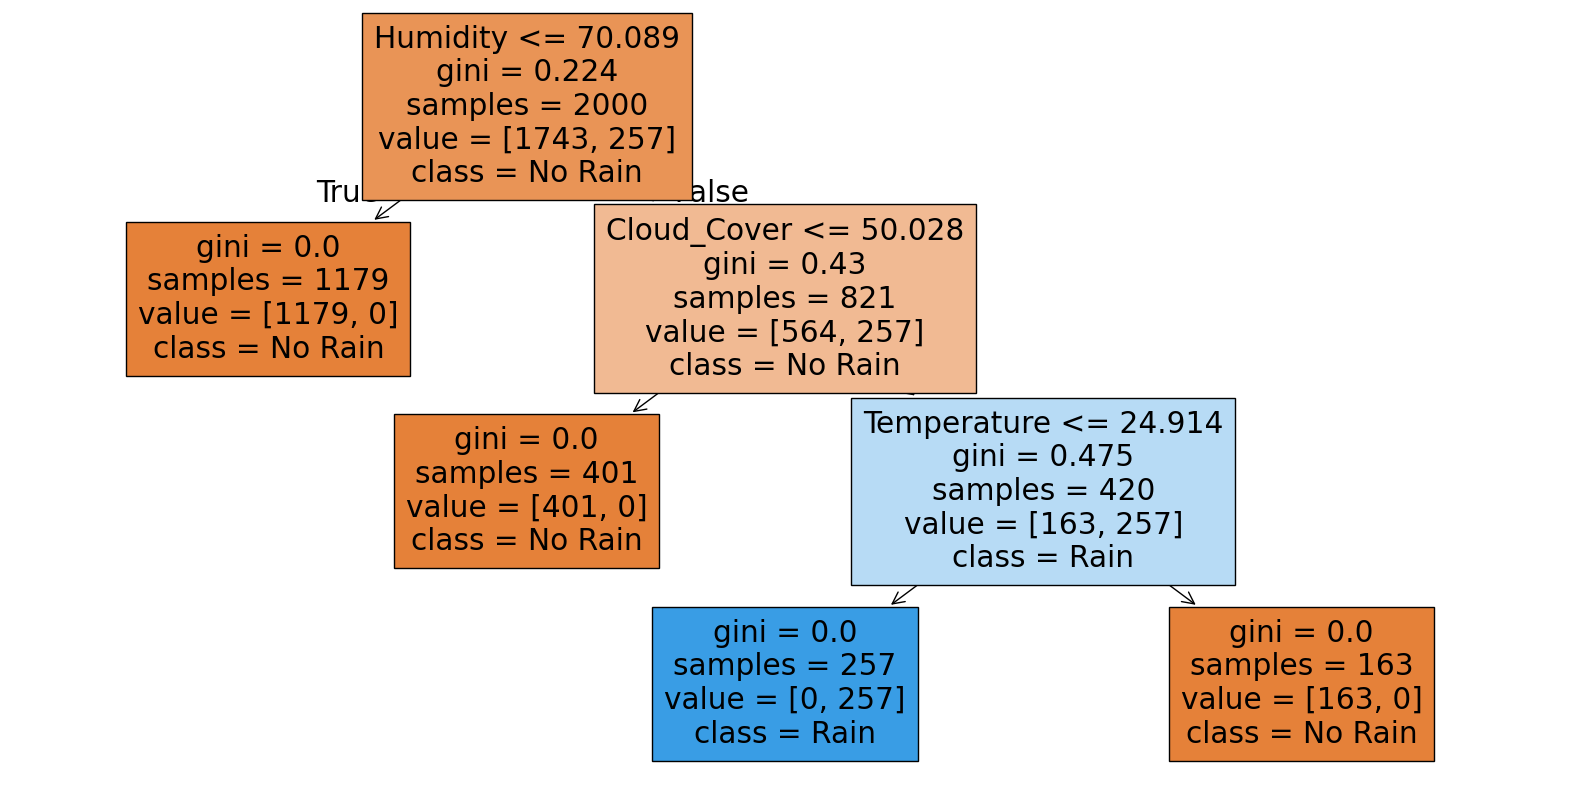

In [ ]:
#plotting the tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, feature_names=X.columns, class_names=['No Rain', 'Rain'], filled=True)
plt.show()